In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import matplotlib.pylab as pylab

In [5]:
labels = {'mutation type':"Mutation type", 'population size':"Population size", 
          'mutation rate':"Mutation rate", 'crossover rate':"Crossover rate", 
          'constraint penalty':"Constraint penalty", 'haleu swu': 'HALEU SWU \n (kg-SWU)',
          ' mmr_share':'MMR share \n (%)', 'xe100_share':'Xe-100 share \n (%)',
          'voygr_share':'VOYGR share \n (%)', 'lwr':'LWR extensions \n (%)', 
          'mmr_burnup':'MMR burnup \n (MWd/kgU)', 'xe100_burnup':'Xe-100 burnup \n (MWd/kgU)',
         'total_build':'Total build \n percent'}
columns = ['mutation type', 'population size', 'mutation rate', 'crossover rate', 'constraint penalty']
rows = ['haleu swu', ' mmr_share','xe100_share','voygr_share','lwr','mmr_burnup','xe100_burnup', 'total_build']

params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

## Coarse Tuning

In [6]:
coarse = pd.read_csv("coarse_tuning.csv")
coarse['total_build'] = coarse[' mmr_share'] + coarse['xe100_share'] + coarse['voygr_share']
colors = coarse['haleu swu']

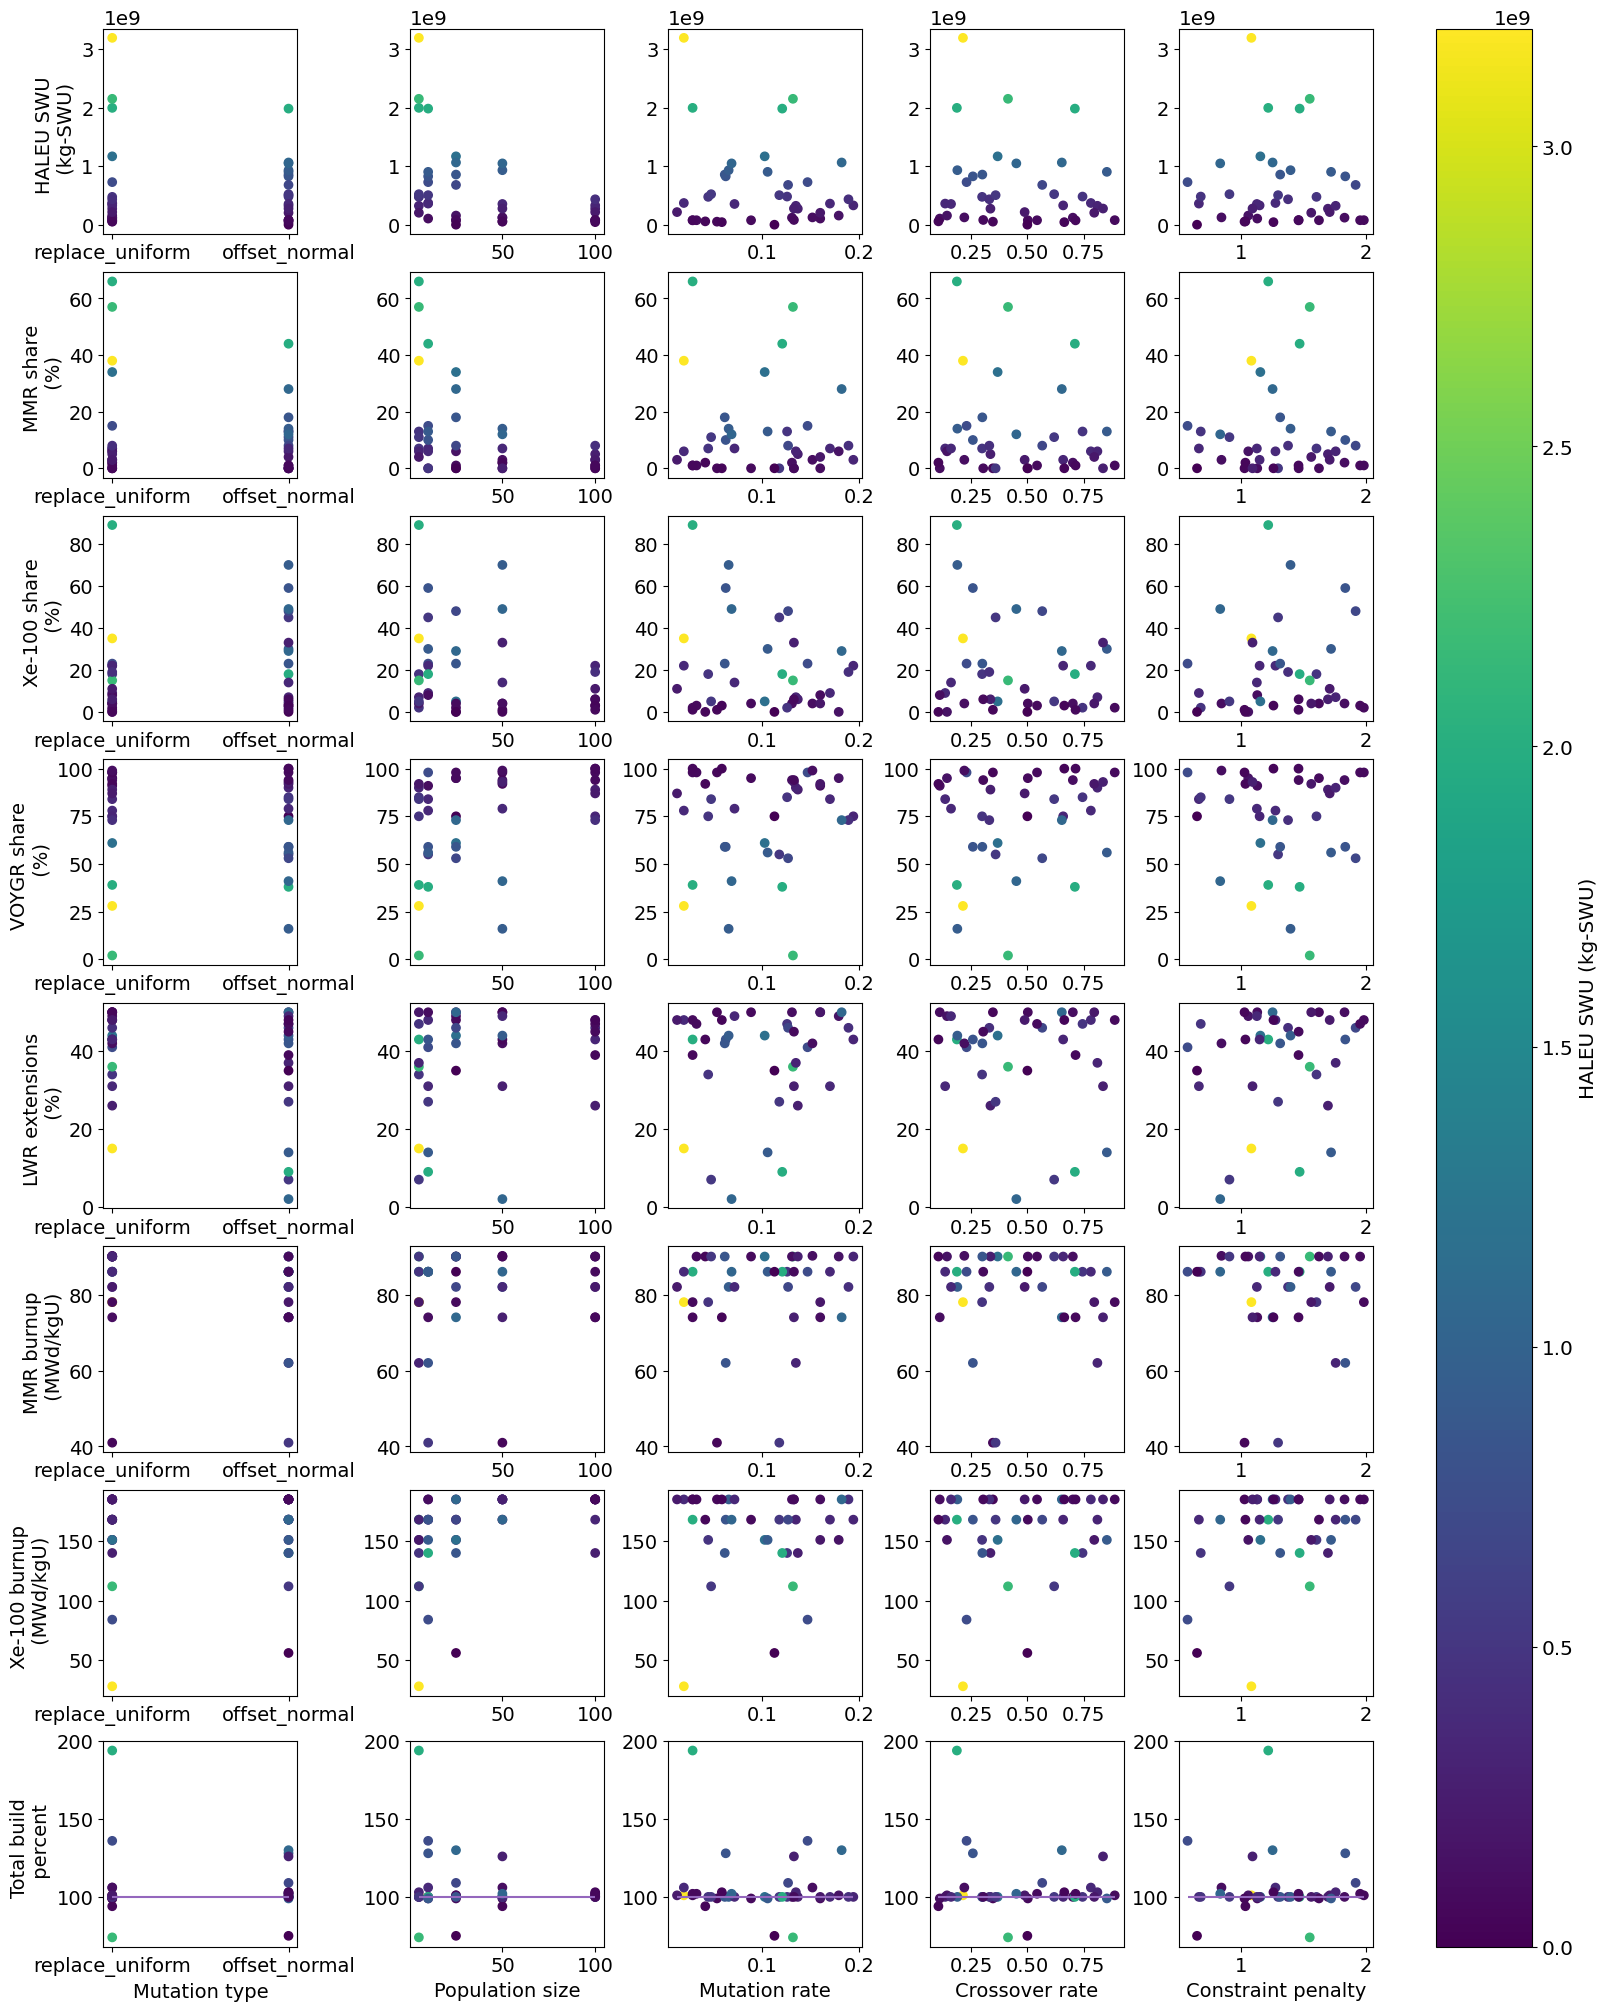

In [7]:
fig = plt.figure(constrained_layout=True, figsize=(16,20))
ax_array = fig.subplots(8, 5, squeeze=False)

for r_index, row in enumerate(rows):
    for c_index, column in enumerate(columns):
        im = ax_array[r_index, c_index].scatter(coarse[column], coarse[row], 
                                                linestyle='None', marker='o', c=colors)
        ax_array[r_index, c_index].tick_params(axis='both', labelsize=14)
        if c_index == 0:
            ax_array[r_index, c_index].set_ylabel(labels[row], fontsize=14)
        if r_index == 7:
            ax_array[r_index, c_index].set_xlabel(labels[column], fontsize=14)
            ax_array[r_index, c_index].hlines(100, coarse[column].min(), coarse[column].max(), color='tab:purple')

fig.colorbar(im, ax=[ax_array[0,0], ax_array[7,4]],label="HALEU SWU (kg-SWU)")

plt.savefig('soga_coarse_tuning_all_parameters.pdf')

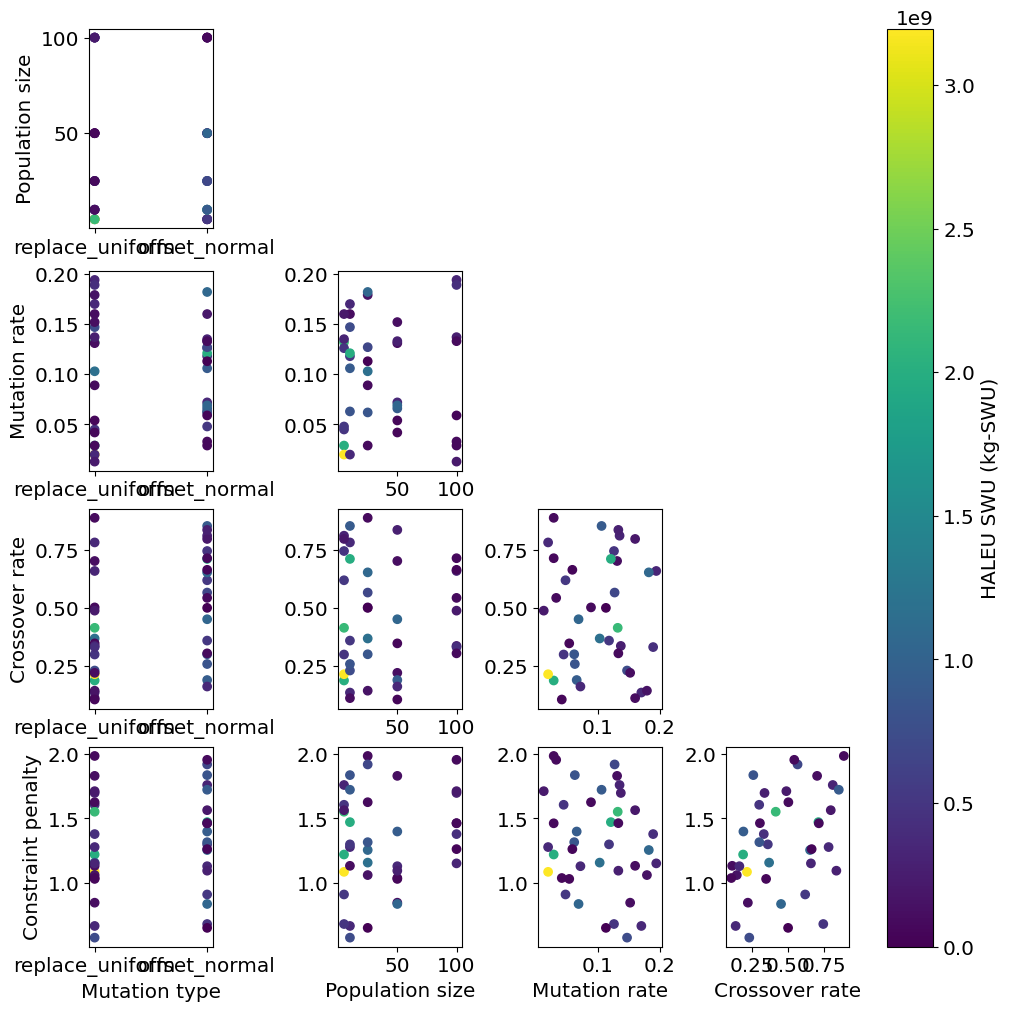

In [8]:
mosaic ="""
A...
BC..
DEF.
GHIJ
"""

fig = plt.figure(constrained_layout=True, figsize=(10,10))
ax_dict = fig.subplot_mosaic(mosaic)
mosaic_dict = {0:"A", 1:"B", 2:"C", 3:"D", 4:"E", 5:"F", 6:"G", 7:"H", 8:"I", 9:"J"}
counter = 0
for x_data in columns:
    for y_data in columns:
        if x_data == y_data:
            break
        im = ax_dict[mosaic_dict[counter]].scatter(coarse[y_data], coarse[x_data], c = colors)
        if counter in [6, 7, 8,9]:
            ax_dict[mosaic_dict[counter]].set_xlabel(labels[y_data])
        if counter in [0,1,3,6]:
            ax_dict[mosaic_dict[counter]].set_ylabel(labels[x_data])
        counter += 1
fig.colorbar(im, ax=[ax_dict['A'], ax_dict['J']],label="HALEU SWU (kg-SWU)")
plt.savefig('soga_coarse_tuning.pdf')

In [9]:
# This cell helps to give an idea of the average SWU from some of the parameters,
# and attach numbers to the visual inspection of the above graphs
for data in ['mutation type', 'population size']:
    unique = coarse[data].unique()
    for item in unique:
        indices = coarse.index[coarse[data] == item]
        swu = coarse['haleu swu'].iloc[indices]
        print(data, item, swu.mean()/1e8) # divide by 1e8 to make the numbers more readable

mutation type replace_uniform 6.2389859732640005
mutation type offset_normal 5.6214321367540006
population size 5 11.6943152092
population size 10 7.2350217234375
population size 25 5.102222729865
population size 50 3.7074160124200004
population size 100 1.9120696001225002


## Fine Tuning

In [10]:
fine = pd.read_csv("fine_tuning.csv")
fine['total_build'] = fine[' mmr_share'] + fine['xe100_share'] + fine['voygr_share']
colors = fine['haleu swu']

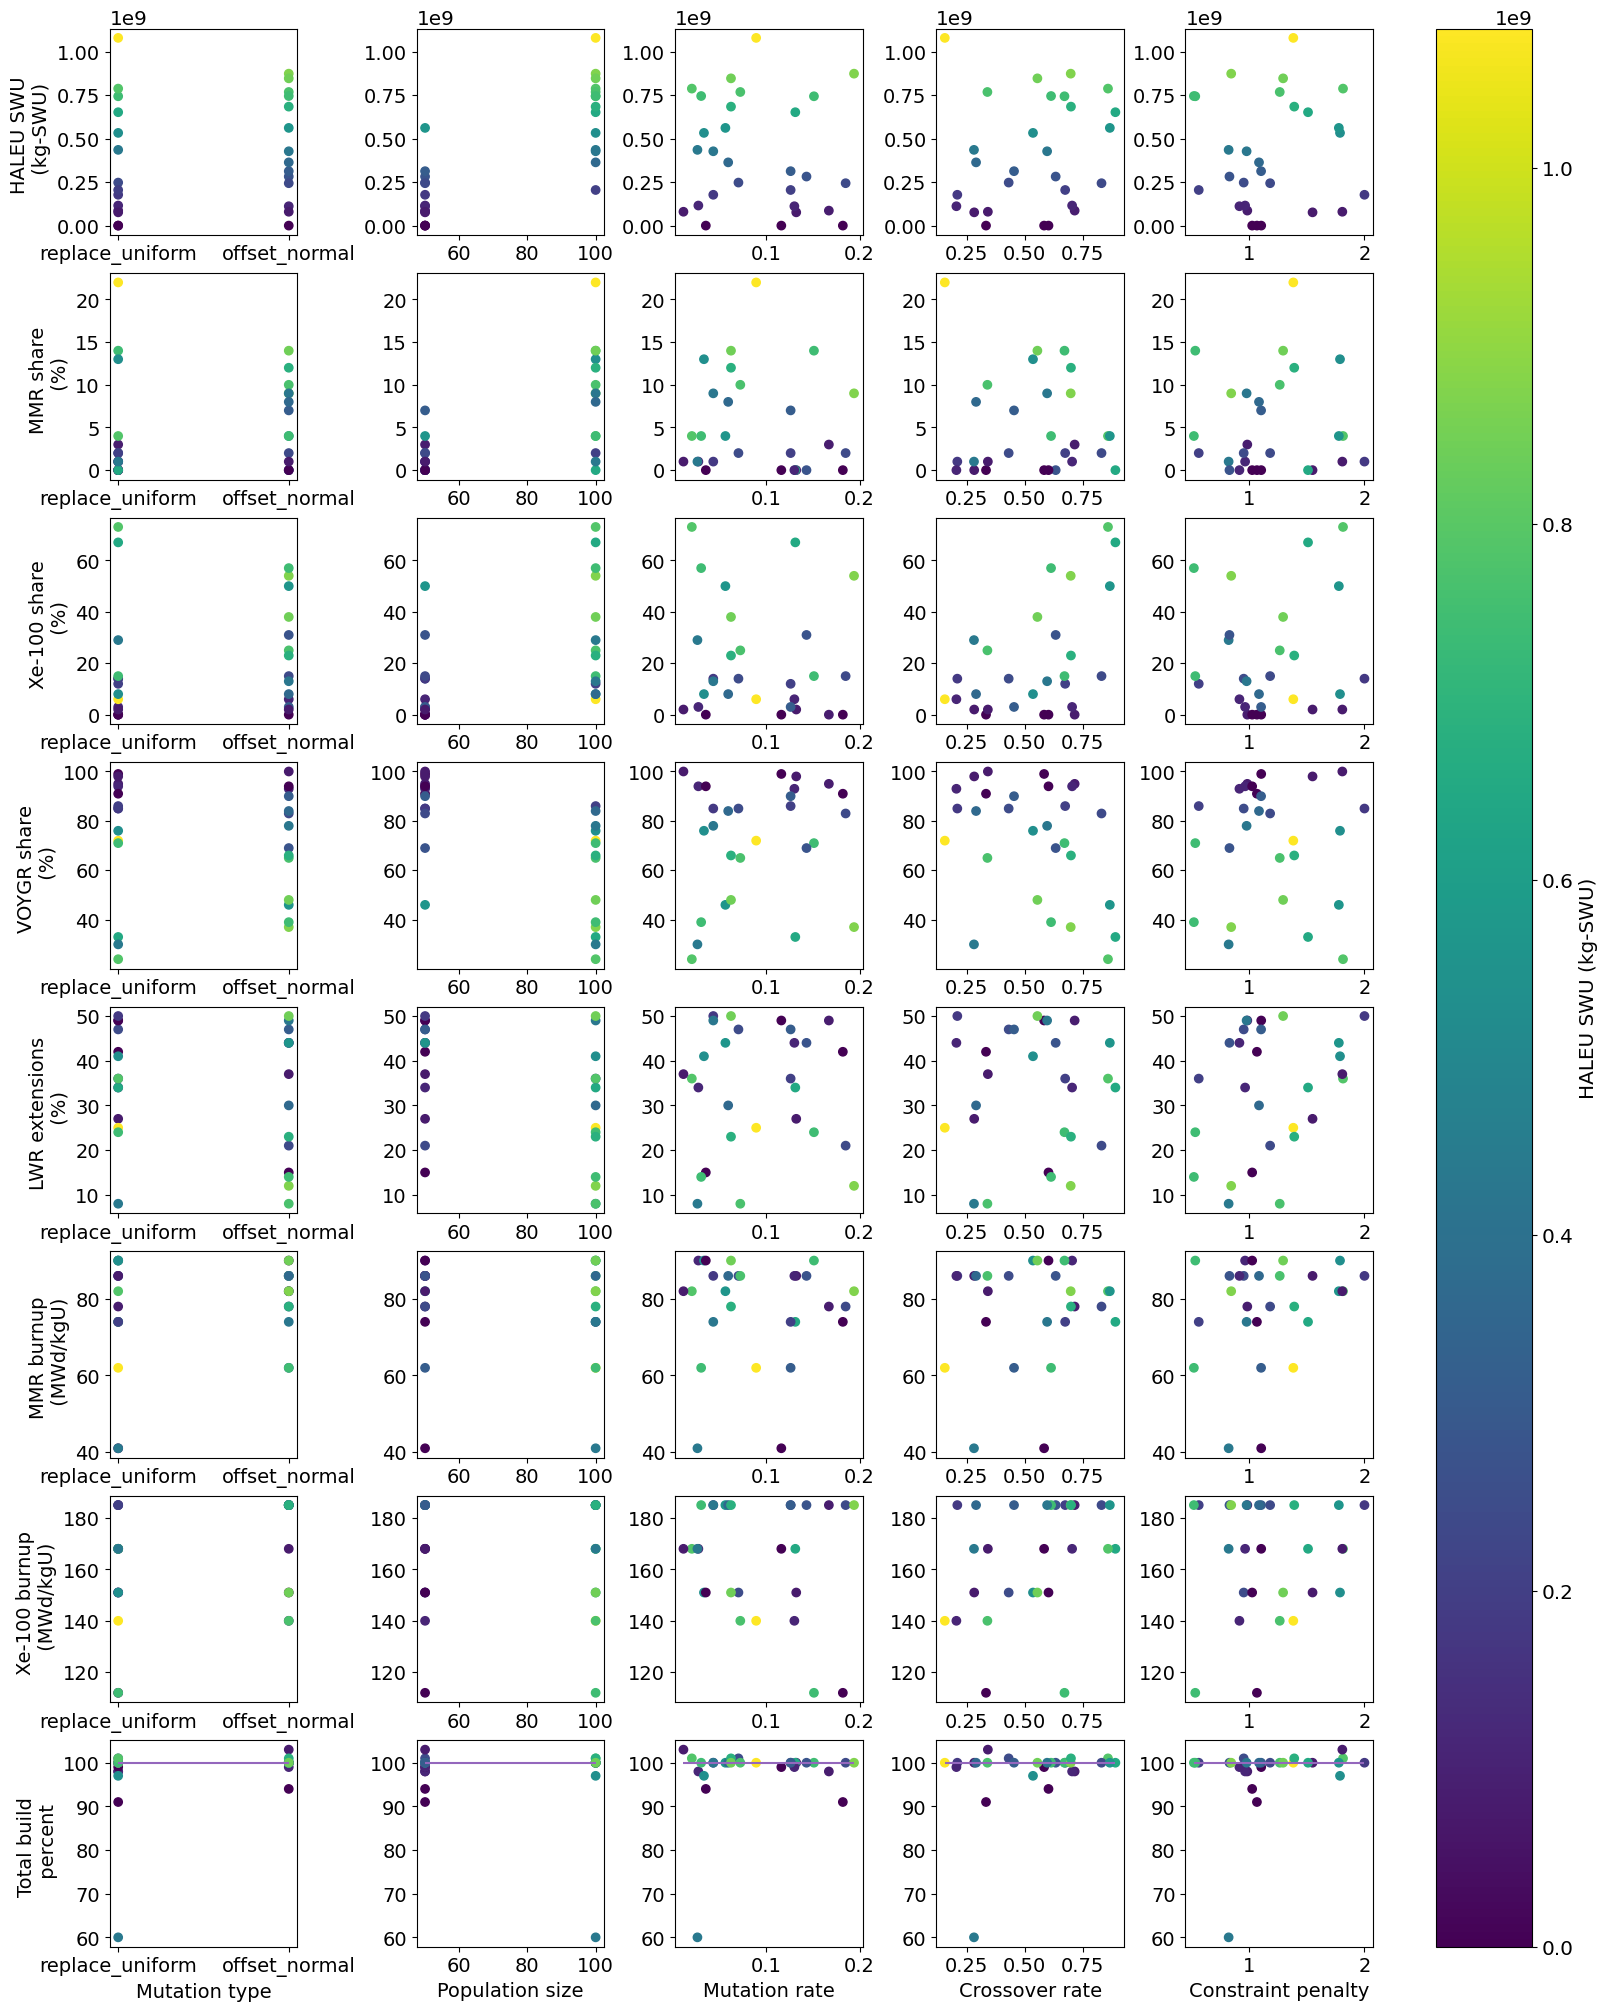

In [11]:
fig = plt.figure(constrained_layout=True, figsize=(16,20))
ax_array = fig.subplots(8, 5, squeeze=False)

for r_index, row in enumerate(rows):
    for c_index, column in enumerate(columns):
        im = ax_array[r_index, c_index].scatter(fine[column], fine[row], 
                                                linestyle='None', marker='o',c=colors)
        ax_array[r_index, c_index].tick_params(axis='both', labelsize=14)
        if c_index == 0:
            ax_array[r_index, c_index].set_ylabel(labels[row], fontsize=14)
        if r_index == 7:
            ax_array[r_index, c_index].set_xlabel(labels[column], fontsize=14)
            ax_array[r_index, c_index].hlines(100, fine[column].min(), fine[column].max(), color='tab:purple')

fig.colorbar(im, ax=[ax_array[0,0], ax_array[7,4]],label="HALEU SWU (kg-SWU)")
plt.savefig('soga_fine_tuning_all_parameters.pdf')

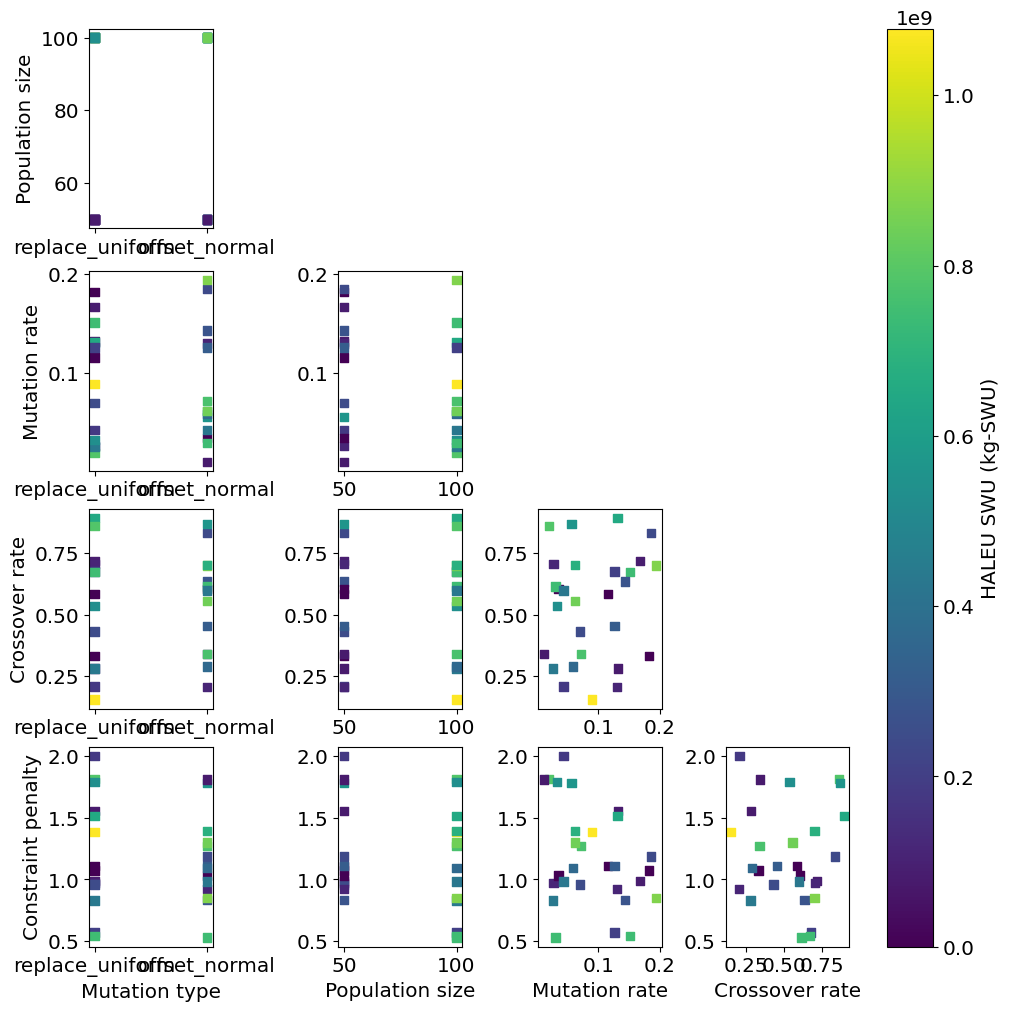

In [12]:
mosaic ="""
A...
BC..
DEF.
GHIJ
"""

fig = plt.figure(constrained_layout=True, figsize=(10,10))
ax_dict = fig.subplot_mosaic(mosaic)
mosaic_dict = {0:"A", 1:"B", 2:"C", 3:"D", 4:"E", 5:"F", 6:"G", 7:"H", 8:"I", 9:"J"}
counter = 0
for x_data in columns:
    for y_data in columns:
        if x_data == y_data:
            break
        im = ax_dict[mosaic_dict[counter]].scatter(fine[y_data], fine[x_data],
                                                   marker='s',c=colors)
        if counter in [6, 7, 8,9]:
            ax_dict[mosaic_dict[counter]].set_xlabel(labels[y_data])
        if counter in [0,1,3,6]:
            ax_dict[mosaic_dict[counter]].set_ylabel(labels[x_data])
        counter += 1
fig.colorbar(im, ax=[ax_dict['A'], ax_dict['J']],label="HALEU SWU (kg-SWU)")
plt.savefig('soga_fine_tuning.pdf')